<a href="https://colab.research.google.com/github/Niveditagupta03/Chat-Room-server/blob/master/deepLearing_traffic_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('traffic.csv', parse_dates=['DateTime'])

In [19]:
traffic = data['Vehicles'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_traffic = scaler.fit_transform(traffic)


In [20]:
train_size = int(len(scaled_traffic) * 0.8)
train_data = scaled_traffic[:train_size]
test_data = scaled_traffic[train_size:]

In [21]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

In [22]:
sequence_length = 10

# Create the input sequences and labels
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [23]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)


Epoch 1/10
1203/1203 [==============================] - 9s 6ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 2/10
1203/1203 [==============================] - 7s 6ms/step - loss: 7.6863e-04 - val_loss: 9.1954e-04
Epoch 3/10
1203/1203 [==============================] - 6s 5ms/step - loss: 7.2387e-04 - val_loss: 9.2982e-04
Epoch 4/10
1203/1203 [==============================] - 7s 6ms/step - loss: 7.1634e-04 - val_loss: 9.1603e-04
Epoch 5/10
1203/1203 [==============================] - 6s 5ms/step - loss: 6.9774e-04 - val_loss: 8.9771e-04
Epoch 6/10
1203/1203 [==============================] - 7s 6ms/step - loss: 6.9349e-04 - val_loss: 8.7287e-04
Epoch 7/10
1203/1203 [==============================] - 6s 5ms/step - loss: 6.9189e-04 - val_loss: 9.4062e-04
Epoch 8/10
1203/1203 [==============================] - 7s 5ms/step - loss: 6.8292e-04 - val_loss: 8.6576e-04
Epoch 9/10
1203/1203 [==============================] - 6s 5ms/step - loss: 6.7211e-04 - val_loss: 8.7774e-04
Epoch 10/10
301/30

In [25]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)


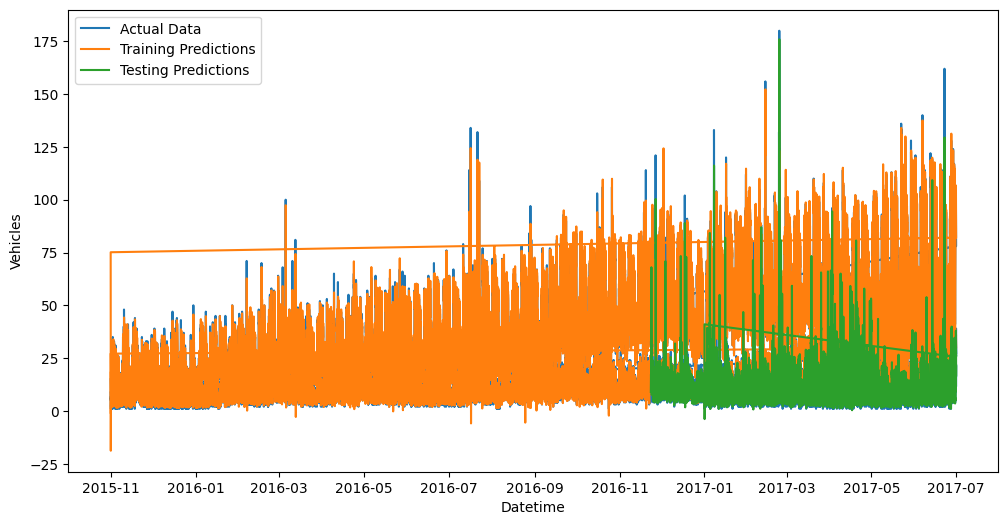

In [27]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime'], data['Vehicles'], label='Actual Data')
plt.plot(data['DateTime'].iloc[sequence_length:train_size], train_predictions, label='Training Predictions')
plt.plot(data['DateTime'].iloc[train_size+sequence_length:], test_predictions, label='Testing Predictions')
plt.xlabel('Datetime')
plt.ylabel('Vehicles')
plt.legend()
plt.show()